Metropolis Hasting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rvs_cond(n,a,rho): # Génère un échantillon suivant une loi normale
        return np.random.normal(loc=rho*a, scale=np.sqrt(1-rho**2), size=n)

In [3]:
def gibbs(n,rho,x0,x1): # Implémentation de l'algorithme de Gibbs
    x=[x0]
    y=[x1]
    for _ in range(1,100):
        x.append(rvs_cond(1,y[-1],rho)[0])
        y.append(rvs_cond(1,x[-1],rho)[0])

    x = np.array(x)
    y = np.array(y)

    return np.stack((x, y)).T



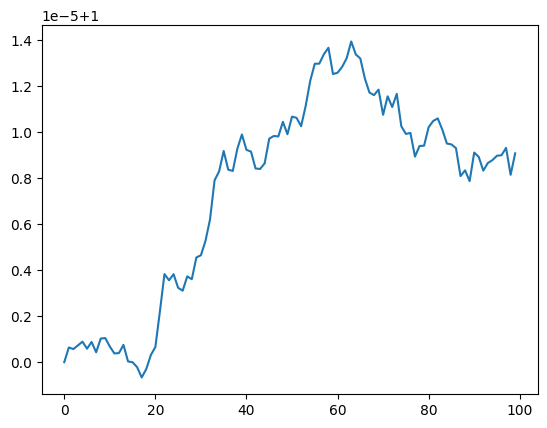

In [9]:
plt.plot(gibbs(100,0.9999999999999,1,1)[:,0])

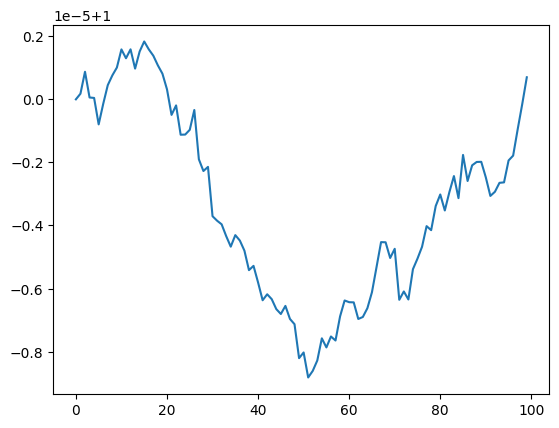

In [10]:
plt.plot(gibbs(100,0.9999999999999,1,1)[:,1])

In [11]:
import scipy.stats as stat

In [12]:
def f(a,b,c):
    return stat.multivariate_normal.pdf(a,b,c)

échantillonner à partir d'une distribution bivariée

In [14]:
#MAINTENANT METROPOLIS HASTINGS
def metropolis_hastings(n,tau,rho,x0): 
    x = [np.array([x0,x0])] # point initial
    sigma = tau*np.eye(2) # covariance
    for _ in range(1,n):
        x_old = x[-1]
        proposition = stat.multivariate_normal.rvs(mean=x_old,cov=sigma, size=1) # proposition de déplacement
        ratio =f(proposition[0],proposition[1],rho) / f(x_old[0],x_old[1],rho) # Acceptation ou rejet de la proposition
        u = np.random.uniform(0,1,1)
        if u < ratio:
            x.append(proposition)
        else:
            x.append(x_old)

    return np.row_stack(x)


In [15]:
metropolis_hastings(100,0.7,0.5,2)

array([[ 2.        ,  2.        ],
       [ 2.        ,  2.        ],
       [ 1.73880287,  2.09195352],
       [ 1.83102049,  1.5248707 ],
       [ 1.83102049,  1.5248707 ],
       [ 1.83102049,  1.5248707 ],
       [ 1.83102049,  1.5248707 ],
       [ 1.89140737,  1.21569882],
       [ 1.55678787,  0.24592711],
       [ 1.26101515,  1.20126875],
       [ 1.26101515,  1.20126875],
       [ 1.69253986,  1.74660976],
       [ 1.8760673 ,  2.59436499],
       [ 1.59846609,  2.35518527],
       [ 1.59846609,  2.35518527],
       [ 1.46444632,  0.66483088],
       [ 1.46444632,  0.66483088],
       [ 1.46444632,  0.66483088],
       [ 1.46444632,  0.66483088],
       [ 0.08171401, -0.37370209],
       [ 0.08171401, -0.37370209],
       [ 1.30983817,  0.74735737],
       [ 0.6467328 ,  1.43297338],
       [ 1.07275338,  1.4679018 ],
       [ 0.98429933,  1.97769733],
       [ 0.98429933,  1.97769733],
       [ 0.6072341 ,  1.86899662],
       [ 0.6072341 ,  1.86899662],
       [ 0.6072341 ,